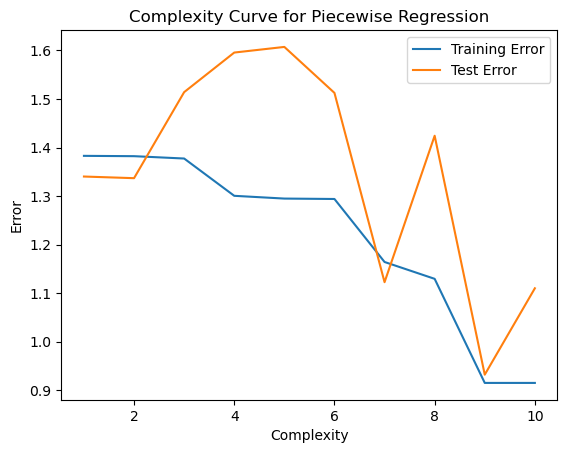

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data
np.random.seed(0)
x = np.linspace(-5, 5, 200)
y = 2.5 * x + np.sin(2 * x) + np.random.normal(0, 1, len(x))

max_degree = 10  # Maximum degree of polynomial regression
complexity_values = []
train_errors = []
test_errors = []

for degree in range(1, max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)

    # Calculate complexity measure - number of coefficients
    complexity_values.append(np.count_nonzero(model.named_steps['linearregression'].coef_))

    # Calculate training error
    train_prediction = model.predict(x[:, np.newaxis])
    train_error = np.mean((train_prediction - y) ** 2)
    train_errors.append(train_error)

    # Generate test data
    x_test = np.linspace(-5, 5, 100)
    y_test = 2.5 * x_test + np.sin(2 * x_test) + np.random.normal(0, 1, len(x_test))

    # Calculate test error
    test_prediction = model.predict(x_test[:, np.newaxis])
    test_error = np.mean((test_prediction - y_test) ** 2)
    test_errors.append(test_error)

# Plotting the complexity curve
plt.figure()
plt.plot(complexity_values, train_errors, label='Training Error')
plt.plot(complexity_values, test_errors, label='Test Error')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.title('Complexity Curve for Piecewise Regression')
plt.legend()
plt.show()
